# **Módulo: Aprendizaje no supervisado**
**Reto | Segmentación de datos empleados**
---

# Cargar datos

In [4]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#2.Carga los datos del archivo
df= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data16/Train.csv')


In [40]:
#Reemplazar datos faltantes
df2 = df.copy(deep=True)
df2['Age'] = df2['Age'].fillna(df2['Age'].mode()[0])
df2['Time_of_service'] = df2['Time_of_service'].fillna(df2['Time_of_service'].mode()[0])
df2['Pay_Scale'] = df2['Pay_Scale'].fillna(df2['Pay_Scale'].mode()[0])

df2['Work_Life_balance'] = df2['Work_Life_balance'].fillna(df2['Work_Life_balance'].mode()[0])
df2['VAR2'] = df2['VAR2'].fillna(df2['VAR2'].mode()[0])
df2['VAR4'] = df2['VAR4'].fillna(df2['VAR4'].mode()[0])

#Eliminamos los que no haya localizado
df2.dropna()

Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_23371      F  42.0                4             Married   
1      EID_18000      M  24.0                3              Single   
2       EID_3891      F  58.0                3             Married   
3      EID_17492      F  26.0                3              Single   
4      EID_22534      F  31.0                1             Married   
...          ...    ...   ...              ...                 ...   
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown                       Unit Decision_skill_possess  \
0        Franklin                         IT             Conceptual   
1     Springfield                  Logistics             Analytical   
2         Clinton                    Quality             Conceptual   
3         Lebanon  Human Resource Management             Behavioral   
4     Springfield                  Logistics             Conceptual   
...           ...                        ...                    ...   
6995     Franklin                 Operarions             Behavioral   
6996      Lebanon                        R&D             Analytical   
6997  Springfield                         IT              Directive   
6998   Washington                      Sales             Behavioral   
6999     Franklin                         IT              Directive   

      Time_of_service  Time_since_promotion  ...  Compensation_and_Benefits  \
0                 4.0                     4  ...                      type2   
1                 5.0                     4  ...                      type2   
2                27.0                     3  ...                      type2   
3                 4.0                     3  ...                      type2   
4                 5.0                     4  ...                      type3   
...               ...                   ...  ...                        ...   
6995              4.0                     1  ...                      type3   
6996             16.0                     2  ...                      type3   
6997             10.0                     1  ...                      type2   
6998             24.0                     1  ...                      type0   
6999             22.0                     2  ...                      type2   

      Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                   3.0     4  0.7516  1.8688   2.0     4     5     3   
1                   4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                   1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                   1.0     3 -1.8176 -0.4537   2.0     3     7     3   
4                   3.0     1  0.7516 -0.4537   2.0     2     8     2   
...                 ...   ...     ...     ...   ...   ...   ...   ...   
6995                3.0     1  0.7516 -0.4537   2.0     3     7     3   
6996                3.0     2 -0.1048 -2.7762   2.0     4     8     4   
6997                4.0     2 -0.1048 -0.4537   2.0     4     8     3   
6998                2.0     4  0.7516  1.8688   2.0     3     6     3   
6999                3.0     3 -0.1048 -1.6150   3.0     4     5     3   

      Attrition_rate  
0             0.1841  
1             0.0670  
2             0.0851  
3             0.0668  
4             0.1827  
...              ...  
6995          0.7839  
6996          0.1055  
6997          0.7847  
6998          0.4162  
6999          0.0910  

[7000 rows x 24 columns]

# Transforma los datos

In [41]:
#5.Transforma los datos según las características de las variables:
# Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.

df_procesado = df2.copy(deep=True)
df_procesado.drop('Employee_ID', axis=1, inplace=True)

# Aplicando OneHotEncoder para la variable 'Gender'
enc_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_gender_encoded = enc_gender.fit_transform(df_procesado[['Gender']])
gender_categories = enc_gender.categories_[0]
for i, val in enumerate(gender_categories):
  df_procesado['Gender_' + str(val)] = X_gender_encoded[:, i]
df_procesado.drop('Gender', axis=1, inplace=True) # Drop the original 'Gender' column

# Aplicando OneHotEncoder para la variable 'Relationship_Status'
enc_Rel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_rel_encoded = enc_Rel.fit_transform(df_procesado[['Relationship_Status']])
rel_categories = enc_Rel.categories_[0]
for i, val in enumerate(rel_categories):
  df_procesado['Relationship_Status_' + str(val)] = X_rel_encoded[:, i]
df_procesado.drop('Relationship_Status', axis=1, inplace=True) # Drop the original 'Gender' column

# Aplicando OrdinalEncoder para el resto de las columnas de tipo Object
for col in df_procesado.columns:
    if df_procesado[col].dtype == 'object':
        df_procesado[col] = OrdinalEncoder().fit_transform(df_procesado[[col]])

# Todas las coumnas son numéricas en un arreglo
X_train = df_procesado.to_numpy()
X_train


array([[42.,  4.,  1., ...,  0.,  1.,  0.],
       [24.,  3.,  3., ...,  1.,  0.,  1.],
       [58.,  3.,  0., ...,  0.,  1.,  0.],
       ...,
       [49.,  3.,  3., ...,  0.,  0.,  1.],
       [47.,  3.,  4., ...,  0.,  1.,  0.],
       [58.,  3.,  1., ...,  0.,  1.,  0.]])

In [42]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7000 non-null   float64
 1   Education_Level              7000 non-null   int64  
 2   Hometown                     7000 non-null   float64
 3   Unit                         7000 non-null   float64
 4   Decision_skill_possess       7000 non-null   float64
 5   Time_of_service              7000 non-null   float64
 6   Time_since_promotion         7000 non-null   int64  
 7   growth_rate                  7000 non-null   int64  
 8   Travel_Rate                  7000 non-null   int64  
 9   Post_Level                   7000 non-null   int64  
 10  Pay_Scale                    7000 non-null   float64
 11  Compensation_and_Benefits    7000 non-null   float64
 12  Work_Life_balance            7000 non-null   float64
 13  VAR1              

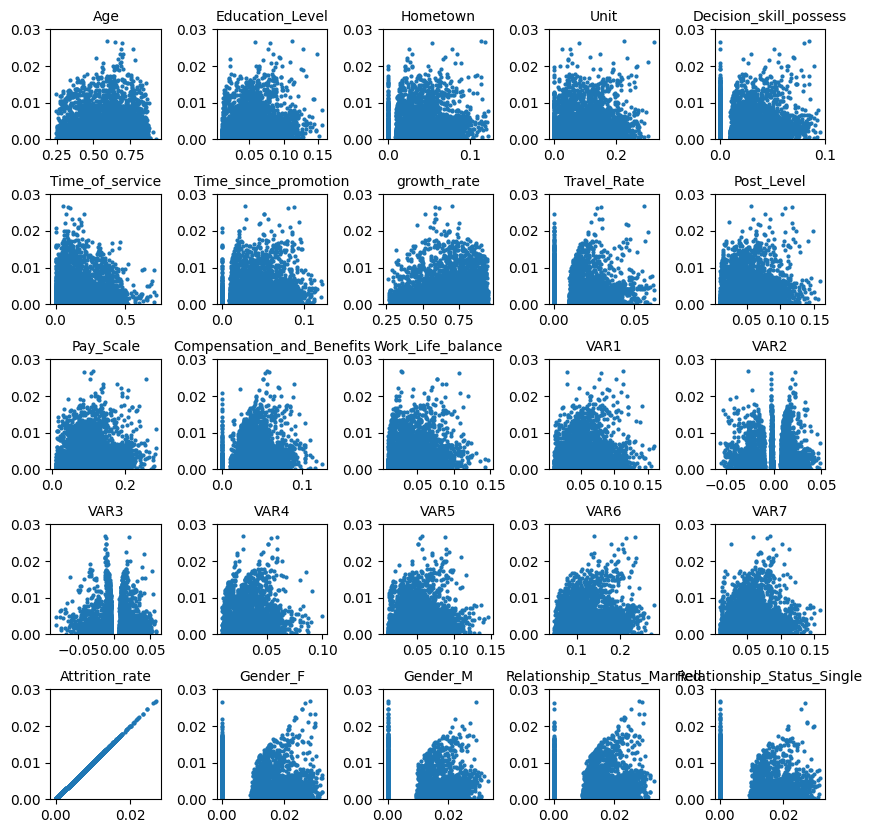

In [43]:
# Normalizar los datos
X1 = Normalizer().fit_transform(X_train)
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X1[:,v], X1[:,20],s=4)
    axs[i,j].set_title(df_procesado.columns[v],fontsize=10)
    axs[i,j].set_ylim([0 ,0.03])
    v+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

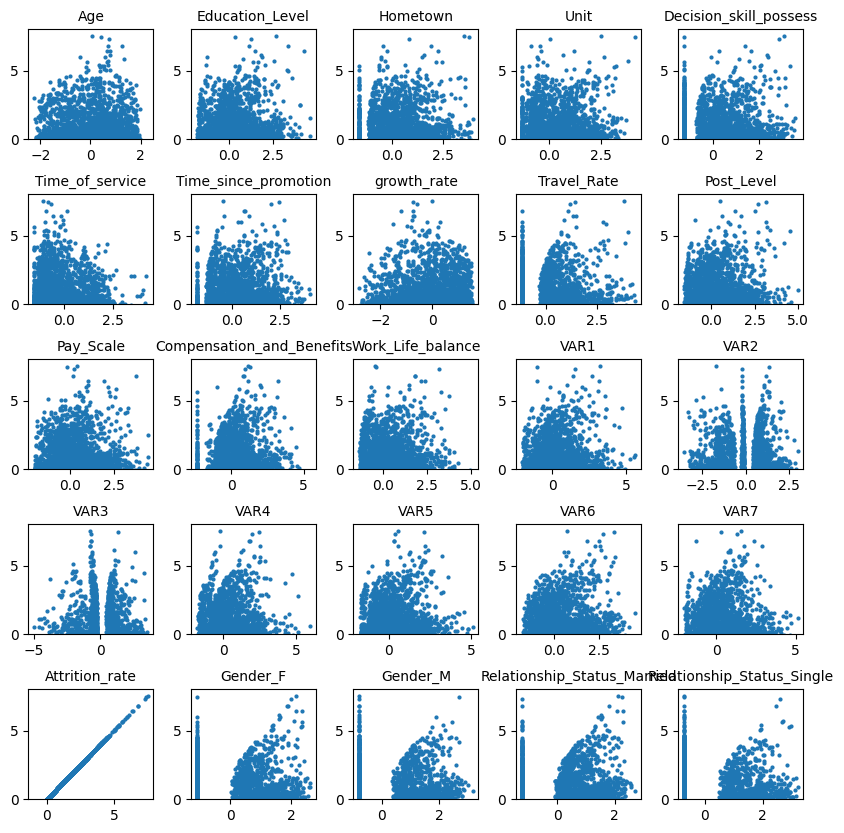

In [44]:
#Estandarizamos los datos para tener una escala similar
X2 = StandardScaler().fit_transform(X1)
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X2[:,v], X2[:,20],s=4)
    axs[i,j].set_title(df_procesado.columns[v],fontsize=10)
    axs[i,j].set_ylim([0,8])
    v+=1

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Número de agrupaciones utilizando la gráfica K-Elbow y el índice Silhouette

In [12]:
np.random.seed(0)
f = 11
t = 'Compensation_and_Benefits'
nc = 25

In [45]:
#ejecutamos los algoritmos
results_km = {}
results_sl = {}
results_sc = {}

for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  results_km[k] = metrics.silhouette_score(X2, y_pred)

  y_pred2 = cluster.AgglomerativeClustering(linkage="single", n_clusters=k).fit_predict(X2)
  results_sl[k] = metrics.silhouette_score(X2, y_pred2)

  y_pred3 = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors").fit_predict(X2)
  results_sc[k] = metrics.silhouette_score(X2, y_pred3)

clusters_counts_km = list(results_km.keys())
index_values_km = list(results_km.values())

clusters_counts_sl = list(results_sl.keys())
index_values_sl = list(results_sl.values())

clusters_counts_sc = list(results_sc.keys())
index_values_sc = list(results_sc.values())

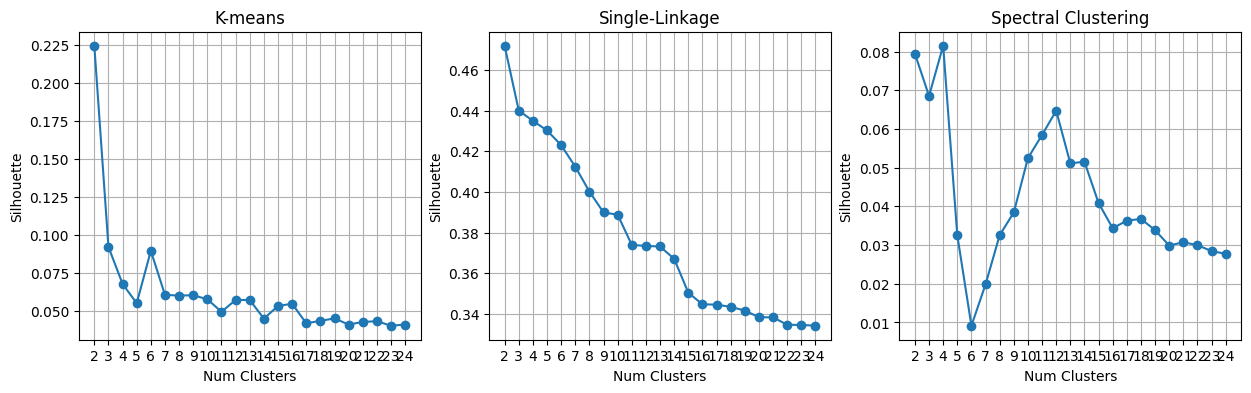

In [46]:
#Graficamos los diferentes algoritmos
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.plot(clusters_counts_km, index_values_km, 'o-')
ax0.grid(True)
ax0.set_title('K-means')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts_km)
ax0.set_ylabel('Silhouette')

ax1.plot(clusters_counts_sl, index_values_sl, 'o-')
ax1.grid(True)
ax1.set_title('Single-Linkage')
ax1.set_xlabel('Num Clusters')
ax1.set_xticks(clusters_counts_sl)
ax1.set_ylabel('Silhouette')

ax2.plot(clusters_counts_sc, index_values_sc, 'o-')
ax2.grid(True)
ax2.set_title('Spectral Clustering')
ax2.set_xlabel('Num Clusters')
ax2.set_xticks(clusters_counts_sc)
ax2.set_ylabel('Silhouette')

plt.show()

In [47]:
#Índice Calinski-Harabasz
y_preds = []
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X2, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

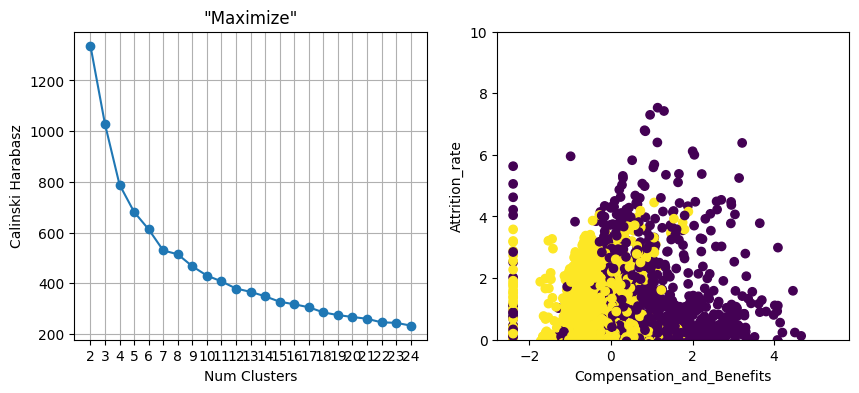

In [48]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X2[:, 11], X2[:, 20], c=y_preds[0])
ax1.set_ylim(0, 10)
ax1.set_xlabel(t)
ax1.set_ylabel('Attrition_rate')

plt.show()

# Selección de números de grupos adecuados

/tmp/ipython-input-4031982232.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



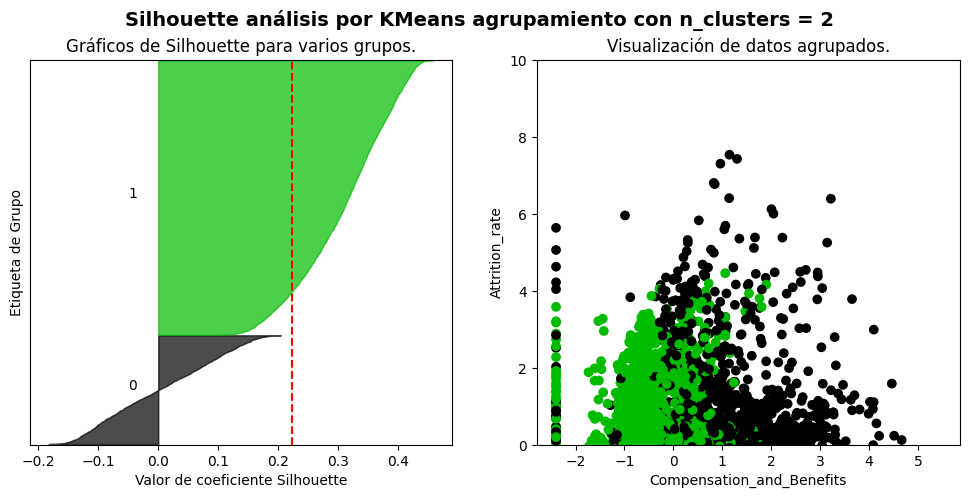

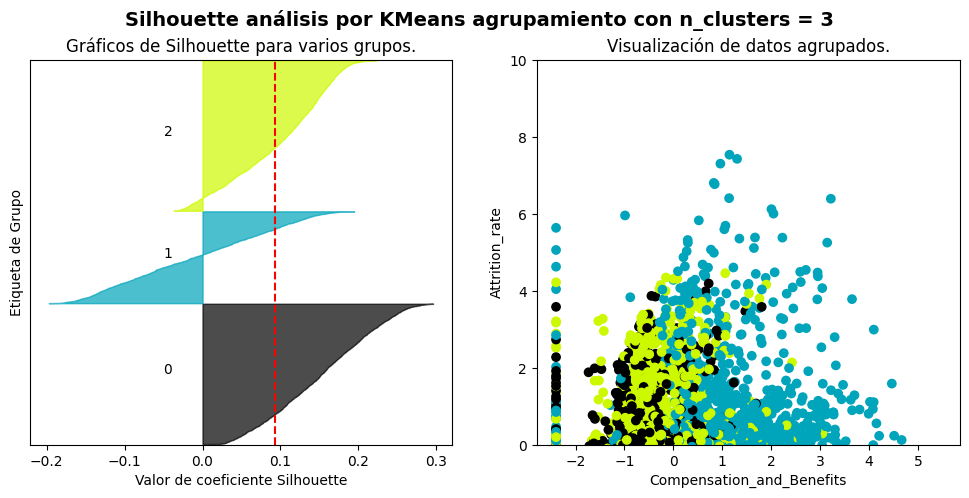

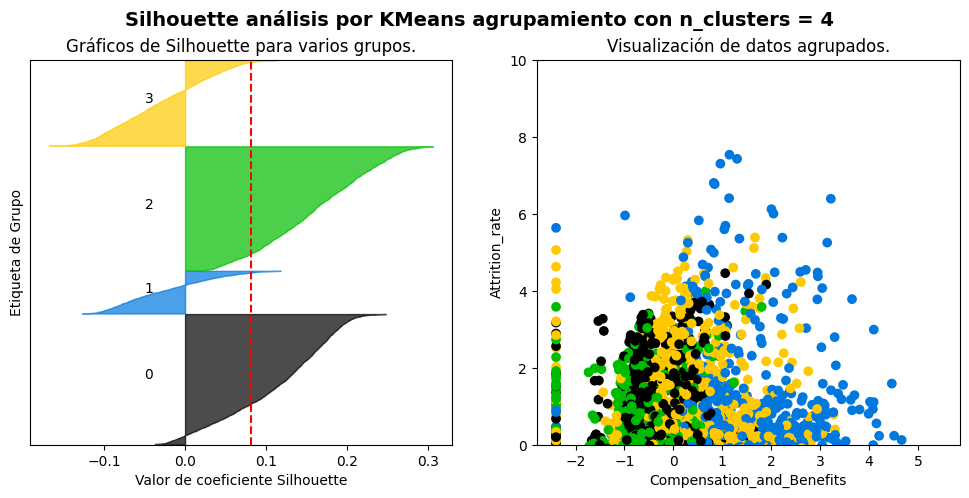

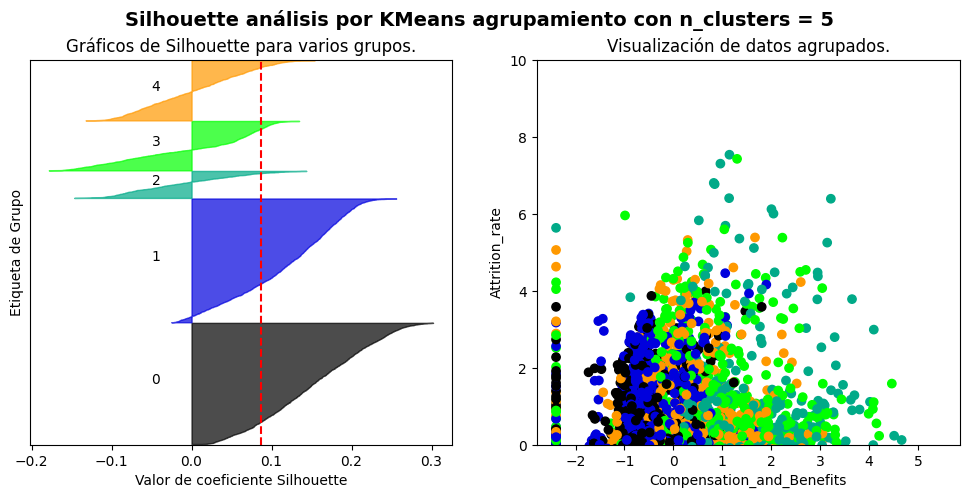

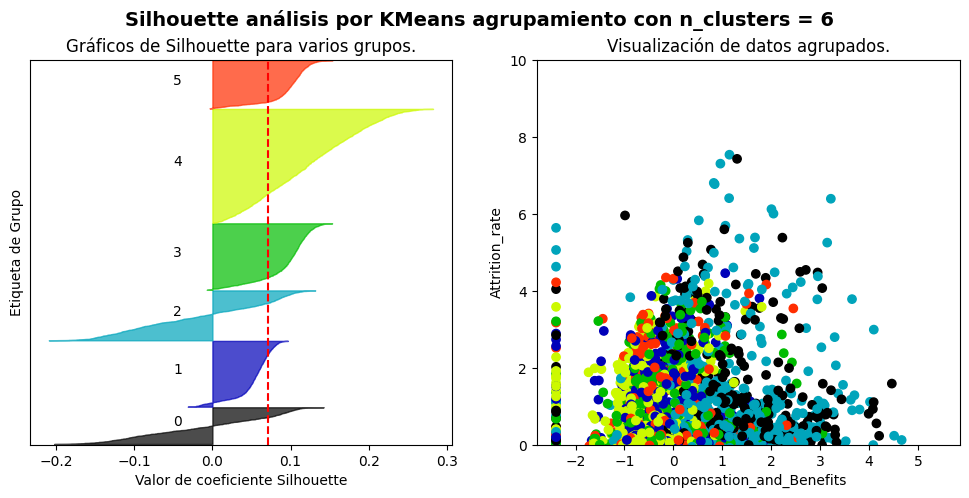

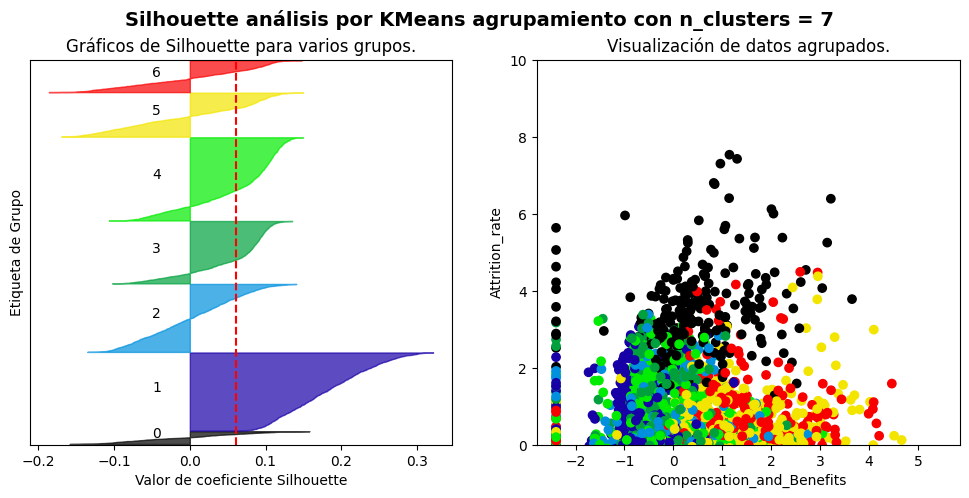

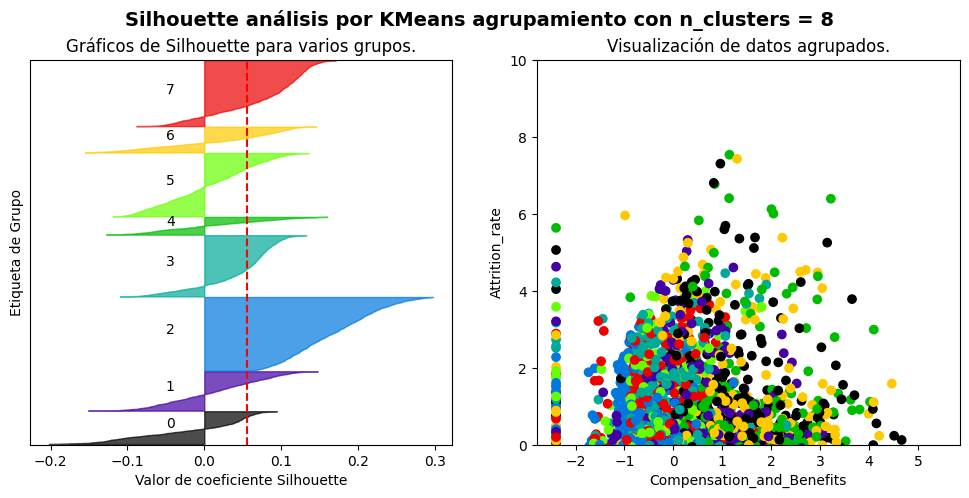

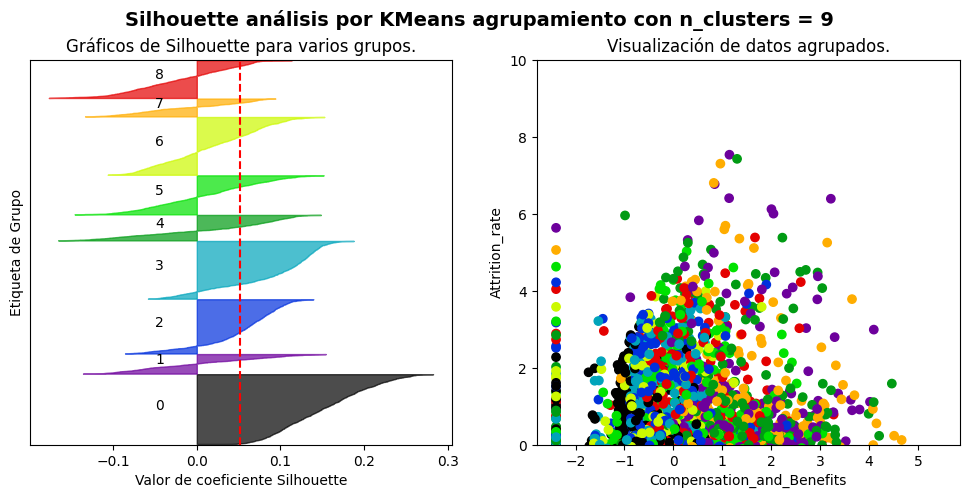

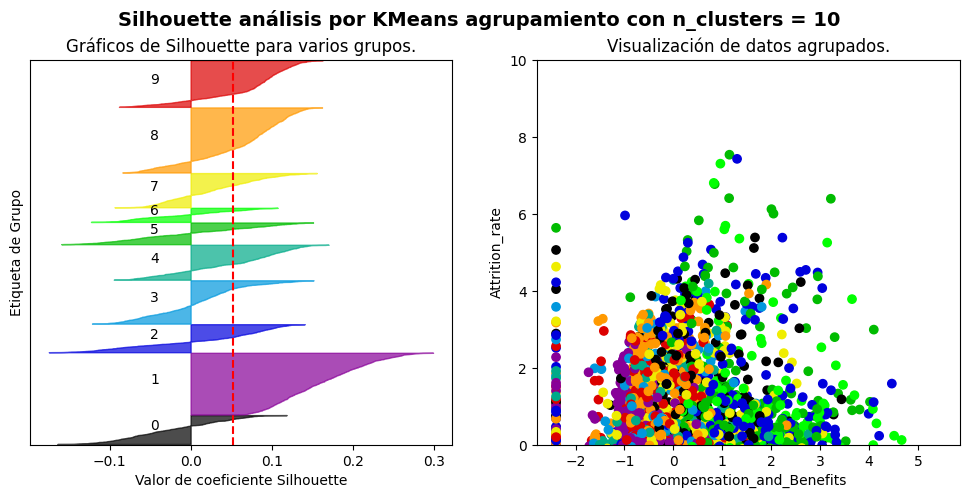

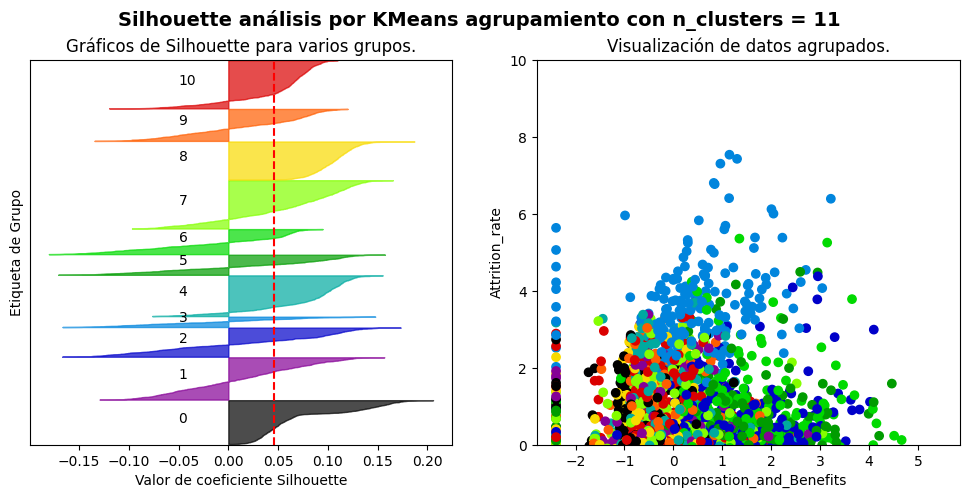

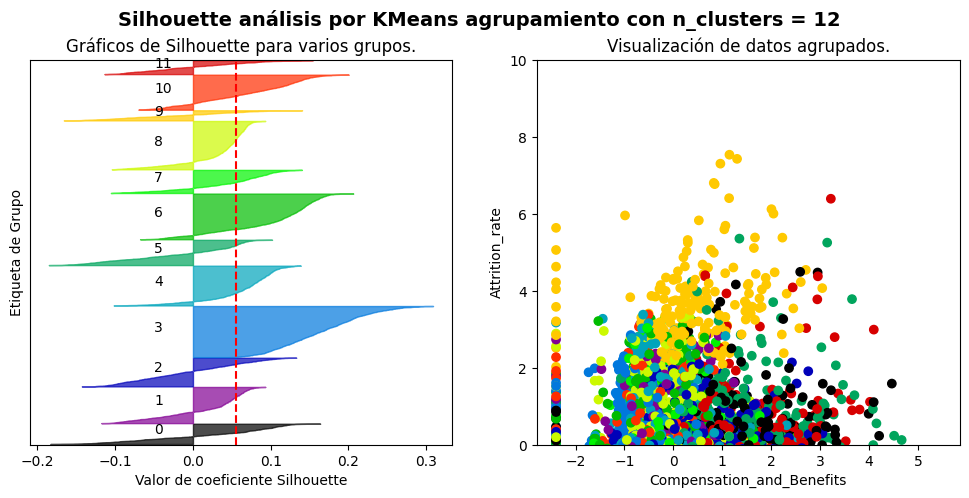

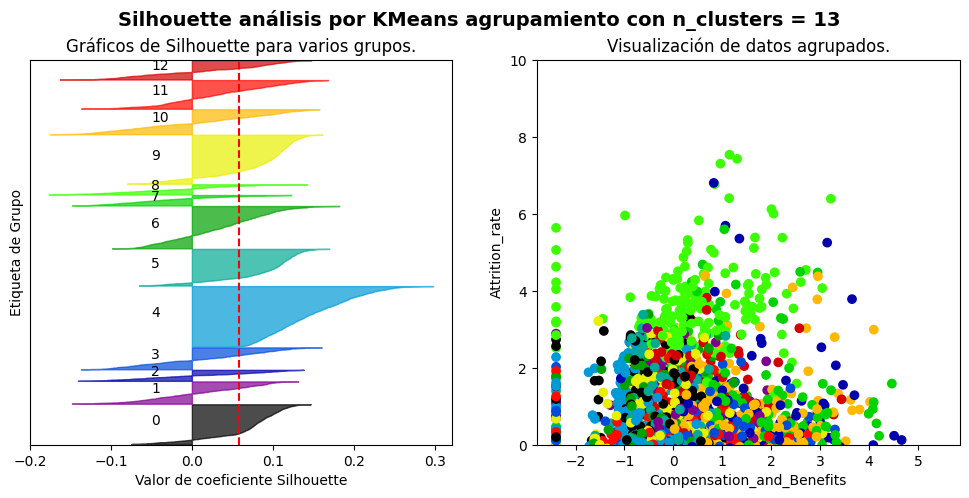

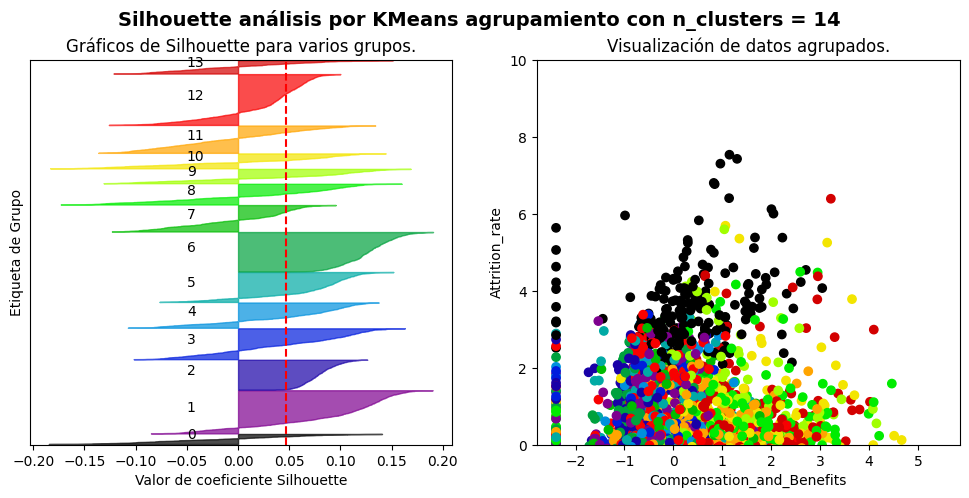

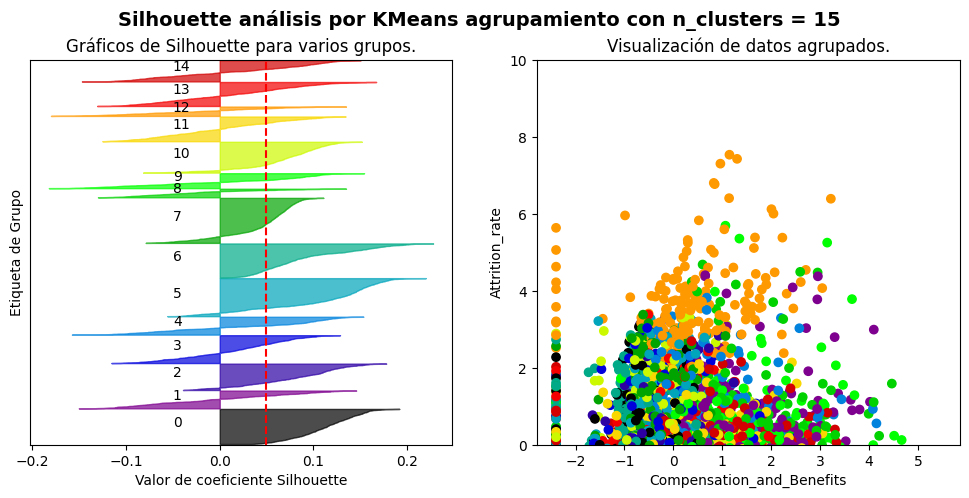

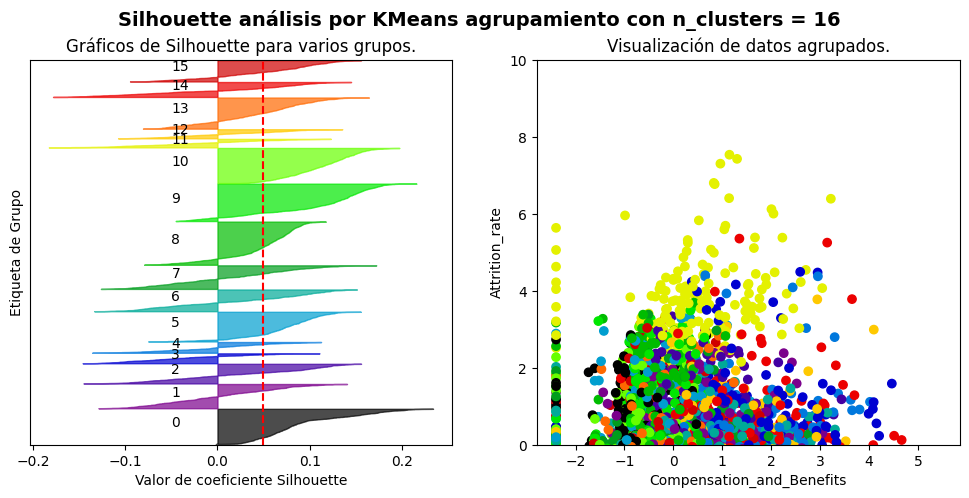

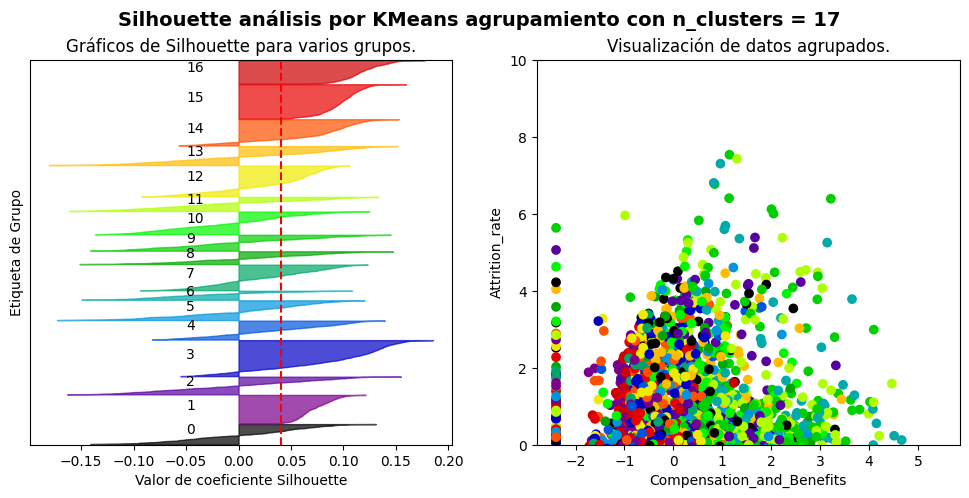

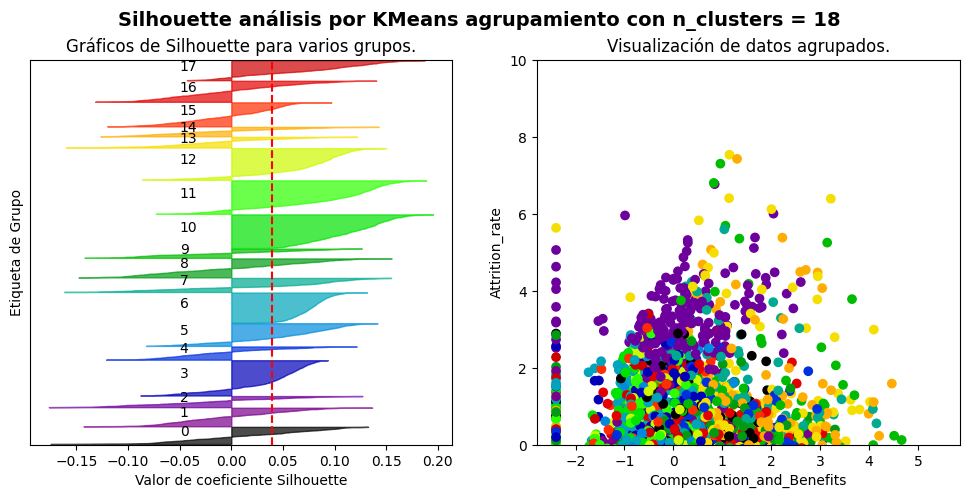

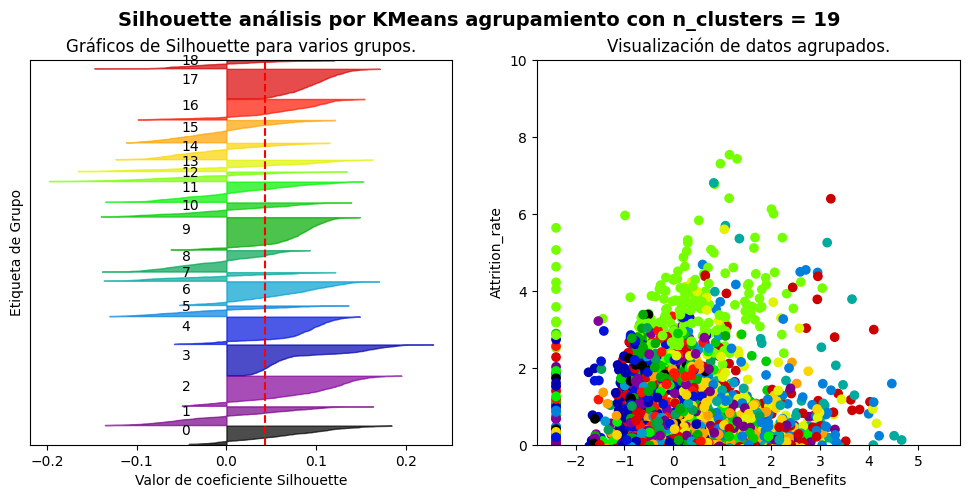

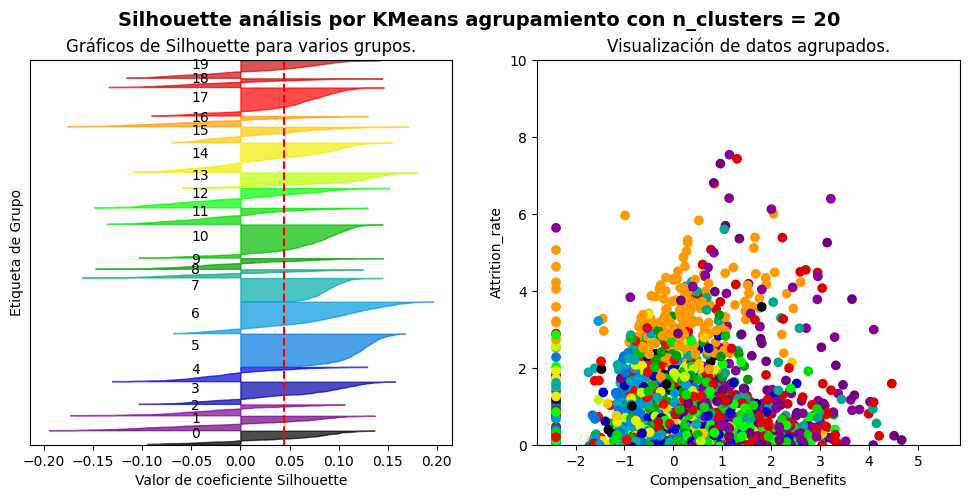

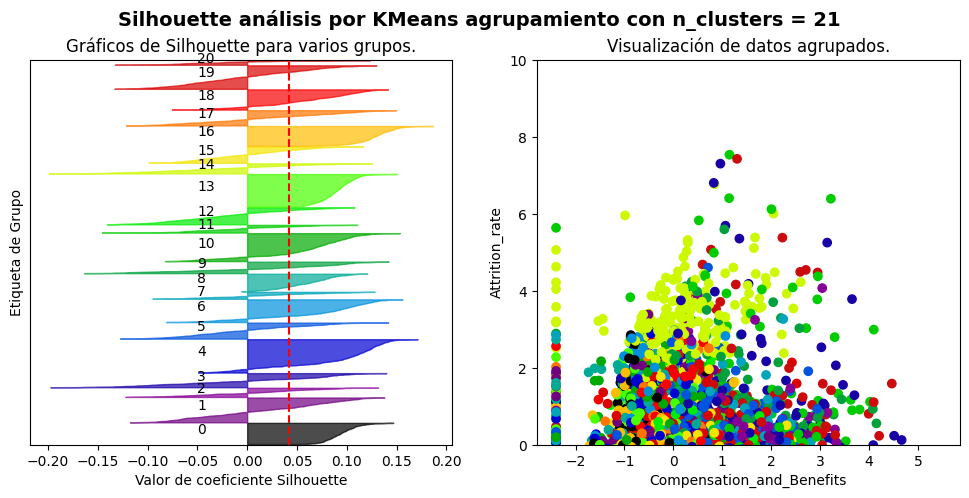

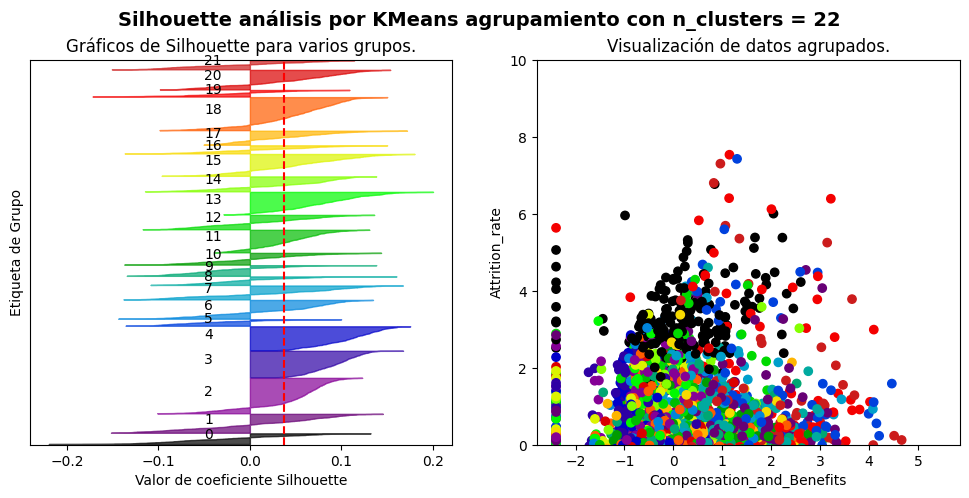

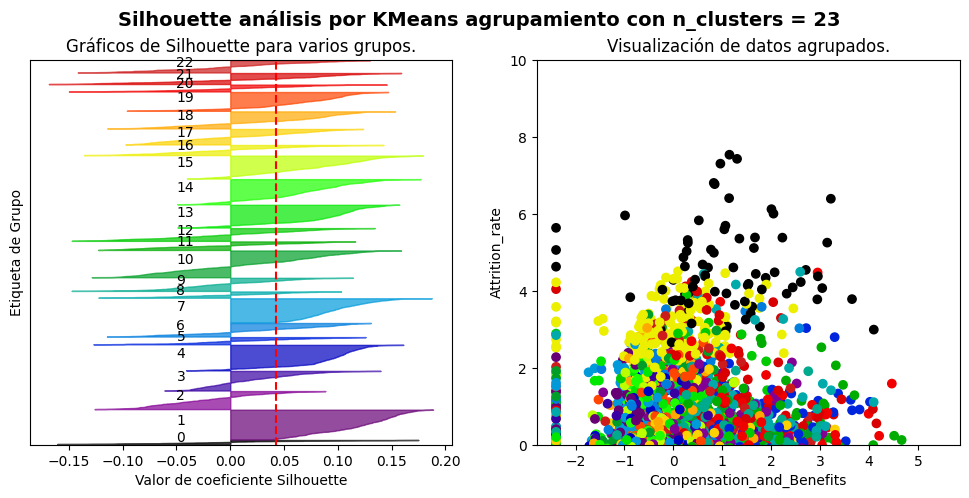

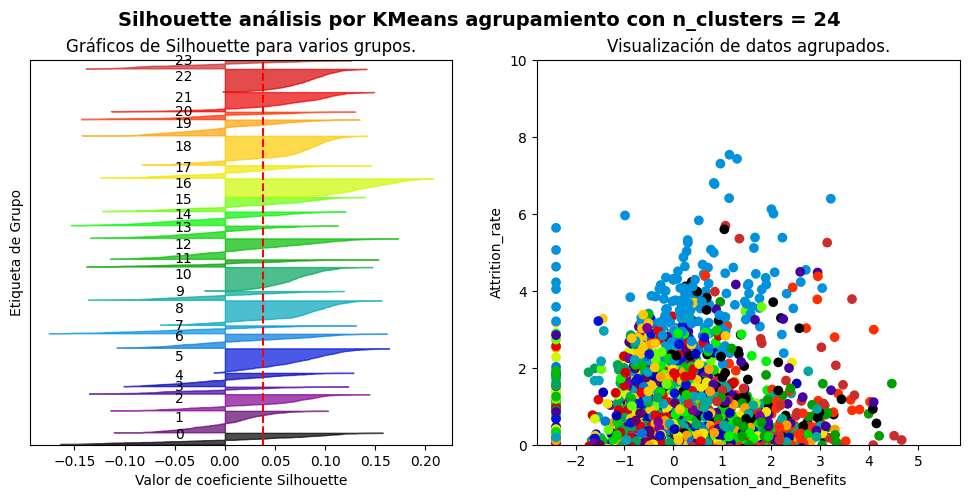

In [52]:
#6.Selecciona el número de grupos adecuados para agrupar usando K-means:
#Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
#Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.


import matplotlib.cm as cm

X_train2 = X2

for k in range(2, nc):
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)
  ax0.set_ylim([0, len(X_train2) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X_train2)
  silhouette_avg = metrics.silhouette_score(X_train2, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X_train2, y_pred)

  y_lower = 10
  for i in range(k):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # etiqueta the silhouette con el número de grupo
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

  ax0.set_title("Gráficos de Silhouette para varios grupos.")
  ax0.set_xlabel("Valor de coeficiente Silhouette")
  ax0.set_ylabel("Etiqueta de Grupo")
  ax0.set_yticks([])

  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X_train2[:, 11], X_train2[:, 20], c=colors)
  ax1.set_ylim(0, 10)
  ax1.set_title("Visualización de datos agrupados.")
  ax1.set_xlabel(t)
  ax1.set_ylabel('Attrition_rate')

  plt.suptitle(("Silhouette análisis por KMeans agrupamiento con n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

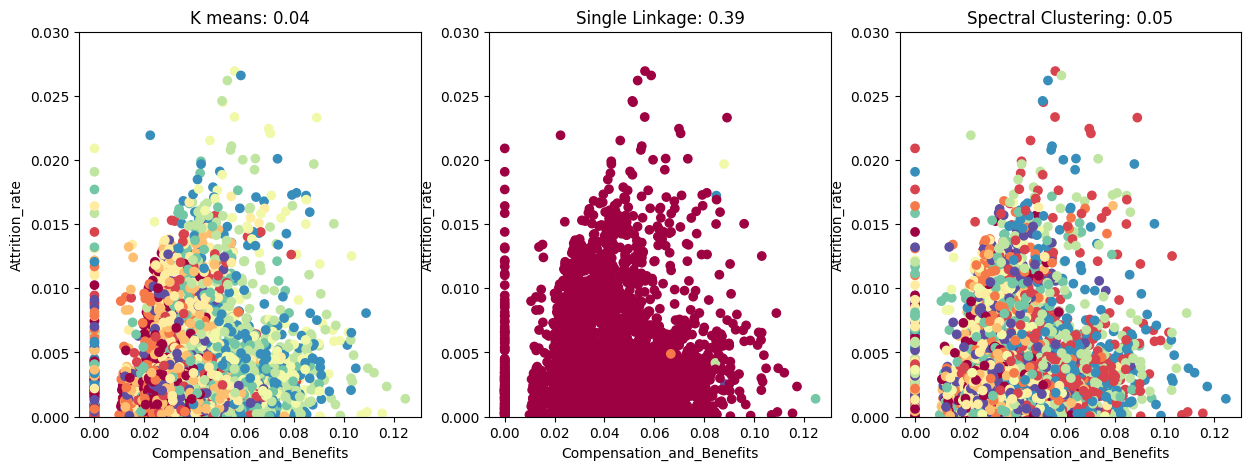

In [18]:
#Comparación relativa de distintos Algoritmos de Agrupamiento

k = 10  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X2)
s1 = metrics.silhouette_score(X2, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X2)
s2 = metrics.silhouette_score(X2, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X2)
s3 = metrics.silhouette_score(X2, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,5))

X_train3= X1
ax0.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0,0.03)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel(t)
ax0.set_ylabel('Attrition_rate')

ax1.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0,0.03)
ax1.set_xlabel(t)
ax1.set_ylabel('Attrition_rate')

ax2.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0,0.03)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel(t)
ax2.set_ylabel('Attrition_rate')

plt.show()

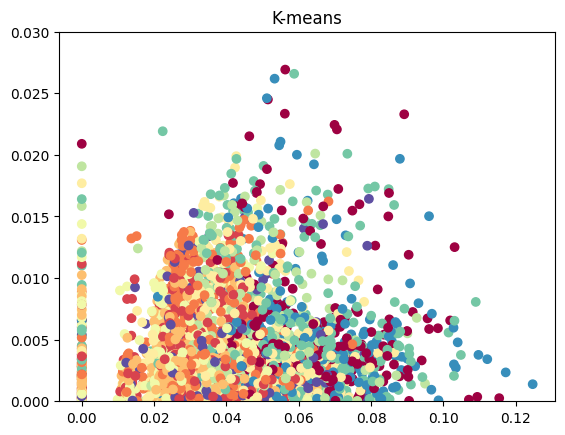

In [53]:

k = 10  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X2)
s1 = metrics.silhouette_score(X2, y_pred1)

plt.scatter(X1[:, f], X1[:, 20], c=y_pred1, cmap=plt.cm.Spectral)
plt.ylim(0, 0.03)
plt.title('K-means')
plt.show()

# Segmentación de los Datos

In [54]:
#Segmentación de los Datos
df3 = df2.copy(deep=True)

df3['groups'] = y_pred1
df3 = [df3[df3['groups']==g] for g in range(k)]
df3

[     Employee_ID Gender   Age  Education_Level Relationship_Status  \
 7       EID_1235      F  22.0                3             Married   
 15     EID_20121      F  22.0                3             Married   
 44     EID_15214      F  24.0                3             Married   
 75     EID_12596      F  29.0                2             Married   
 85     EID_17650      F  23.0                3             Married   
 ...          ...    ...   ...              ...                 ...   
 6865   EID_16941      M  22.0                3             Married   
 6888   EID_17796      F  25.0                4             Married   
 6890   EID_19119      F  20.0                3             Married   
 6989   EID_20243      F  28.0                1             Married   
 6995   EID_16328      F  23.0                5             Married   
 
          Hometown                    Unit Decision_skill_possess  \
 7     Springfield                   Sales              Directive   
 15    S

In [55]:
for g in range(k):
    print('Group'+str(g),'has',len(df3[g]),'empleados.')

Group0 has 344 empleados.
Group1 has 828 empleados.
Group2 has 1261 empleados.
Group3 has 1083 empleados.
Group4 has 724 empleados.
Group5 has 904 empleados.
Group6 has 470 empleados.
Group7 has 545 empleados.
Group8 has 307 empleados.
Group9 has 534 empleados.


# Descripción de los grupos

In [56]:
df_gpo = pd.DataFrame()

df_gpo['Features'] = df3[0].columns[:-1]


for g in range(k):
    row = []
    for col in df_gpo['Features']:
        if df3[g][col].dtype != 'object':
            row.append(np.round(df3[g][col].mean(),2))
        else:
            row.append(df3[g][col].value_counts().keys()[0])
    df_gpo['Group'+str(g)] = row
# Visualizar el dataframe
df_gpo

Features       Group0      Group1      Group2     Group3  \
0                 Employee_ID    EID_16328    EID_8077   EID_12529   EID_1640   
1                      Gender            F           F           F          F   
2                         Age         26.1        33.5       29.81      54.73   
3             Education_Level         3.39        3.12        3.18       3.12   
4         Relationship_Status      Married      Single     Married    Married   
5                    Hometown  Springfield     Lebanon     Lebanon    Lebanon   
6                        Unit           IT          IT          IT         IT   
7      Decision_skill_possess   Analytical  Analytical  Analytical  Directive   
8             Time_of_service         5.26        8.82        6.89      24.84   
9        Time_since_promotion         2.26        2.34        2.28       2.45   
10                growth_rate        27.64       62.42       61.98      49.85   
11                Travel_Rate         0.88        0.84        0.82       0.78   
12                 Post_Level         2.91        2.72        2.73       2.76   
13                  Pay_Scale         6.19        5.97        5.84       5.99   
14  Compensation_and_Benefits        type2       type2       type2      type2   
15          Work_Life_balance         2.45        2.31        2.35       2.36   
16                       VAR1         3.29         3.1        3.07        3.1   
17                       VAR2         0.07        0.06        0.08       0.09   
18                       VAR3        -0.06        0.02       -0.02       0.01   
19                       VAR4         1.93        1.91        1.89       1.86   
20                       VAR5         3.03        2.76        2.77        2.8   
21                       VAR6          7.2        7.05        7.07       7.03   
22                       VAR7         3.31        3.23        3.17       3.21   
23             Attrition_rate         0.19        0.19         0.2       0.17   

       Group4     Group5      Group6     Group7     Group8      Group9  
0   EID_11083   EID_8706   EID_18566  EID_11159  EID_18180    EID_4484  
1           F          M           M          M          F           F  
2       32.64      54.06       28.14      28.92      26.03       50.65  
3        3.21       3.12        3.26        3.2       3.37        3.24  
4     Married    Married      Single    Married     Single      Single  
5     Lebanon    Lebanon     Lebanon    Lebanon    Lebanon     Lebanon  
6          IT         IT   Logistics         IT         IT   Logistics  
7   Directive  Directive  Conceptual  Directive  Directive  Behavioral  
8        8.67      24.27        6.04       6.56       5.82       21.55  
9        2.44       2.45        2.31       2.31       2.26        2.48  
10      39.85      48.22       42.58      32.81      27.15       32.66  
11       0.83       0.82        0.72       0.81        0.9        0.85  
12       2.81       2.74        2.93        2.9       3.09        2.79  
13       6.13       5.96        6.06       6.09        6.3        6.02  
14      type2      type2       type2      type2      type2       type2  
15       2.45       2.32        2.53       2.42       2.43        2.41  
16       3.02       3.07        3.09       3.11       3.26        3.09  
17       0.05       0.06        0.02      -0.02       0.11       -0.04  
18      -0.08        0.0        0.01      -0.05       0.02        -0.0  
19       1.91       1.89        1.91       1.91       1.97        1.92  
20       2.84       2.84        2.92       2.96        2.9        2.78  
21       7.16       7.05        7.23       7.16       7.26        7.06  
22       3.36       3.22        3.39        3.3       3.41        3.25  
23       0.18       0.18        0.21       0.22       0.18        0.18

# PCA

In [57]:
from sklearn.decomposition import PCA

X4 = PCA(n_components=11).fit_transform(X2)


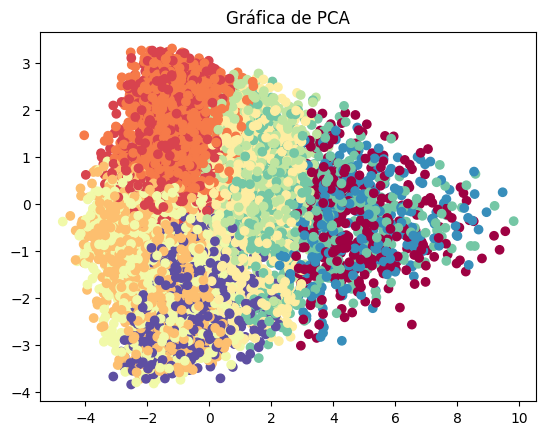

In [59]:
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Gráfica de PCA')
plt.show()

In [60]:
print(X4)

[[ 1.44086054 -0.9324822  -1.66032671 ...  1.04956573 -0.5423713
   0.86070582]
 [ 2.57763145  0.53057978  3.05601838 ... -1.92250535 -1.61152714
   1.42265662]
 [-2.06835499 -1.30605297 -1.05927146 ... -0.36257757  0.90642108
  -0.01923935]
 ...
 [-1.54794965  0.46998943  0.17960511 ...  1.3356662  -0.97903635
  -1.16754338]
 [ 0.57593949 -2.94604867 -1.43809938 ... -0.4341699   0.713734
  -1.18812094]
 [-3.04955755  0.16719131 -0.95107046 ...  0.33069321  0.18217331
  -0.61779505]]


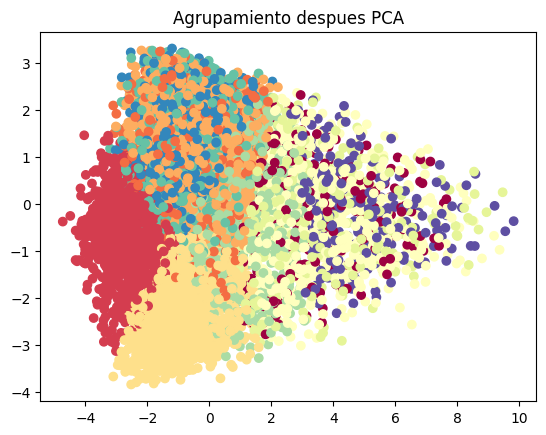

In [63]:
y_pca = cluster.KMeans(n_clusters=11).fit_predict(X4)

plt.scatter(X4[:, 0], X4[:, 1], c=y_pca, cmap=plt.cm.Spectral)
plt.title('Agrupamiento despues PCA')
plt.show()

In [64]:
df_pca = df2.copy(deep=True)
df_pca['groups'] = y_pca
dfs_pca = [df_pca[df_pca['groups']==g] for g in range(k)]

In [65]:
grouped_pca = pd.DataFrame()
grouped_pca['Features'] = df_pca.columns[:-1]
for g in range(k):
    row = []
    for col in grouped_pca['Features']:
        if dfs_pca[g][col].dtype != 'object':
            row.append(np.round(dfs_pca[g][col].mean(),2))
        else:
            row.append(dfs_pca[g][col].value_counts().keys()[0])
    grouped_pca['Group'+str(g)] = row
grouped_pca

Features      Group0      Group1      Group2      Group3  \
0                 Employee_ID   EID_18000    EID_6047   EID_17099    EID_8387   
1                      Gender           M           F           M           F   
2                         Age        28.6       56.07       32.89       30.87   
3             Education_Level         3.3        3.11        3.22         3.2   
4         Relationship_Status      Single     Married      Single     Married   
5                    Hometown     Lebanon     Lebanon     Lebanon     Lebanon   
6                        Unit   Logistics          IT          IT          IT   
7      Decision_skill_possess  Behavioral  Analytical  Analytical  Analytical   
8             Time_of_service        6.42       26.16        8.92        7.43   
9        Time_since_promotion        2.26         2.4        2.31        2.34   
10                growth_rate       30.74       58.29       55.33        57.0   
11                Travel_Rate        0.83         0.8        0.76        0.77   
12                 Post_Level        2.94        2.71        2.81        2.76   
13                  Pay_Scale        6.33         5.9        5.96         5.9   
14  Compensation_and_Benefits       type2       type2       type2       type2   
15          Work_Life_balance        2.48        2.29        2.37        2.37   
16                       VAR1        3.22        3.04        3.11        3.06   
17                       VAR2        0.11        0.05        0.07        0.09   
18                       VAR3       -0.07        0.02        0.04       -0.03   
19                       VAR4        1.94        1.86         1.9        1.92   
20                       VAR5        2.92        2.74        2.81        2.77   
21                       VAR6        7.24        7.03        7.09        7.07   
22                       VAR7        3.41        3.16        3.28        3.21   
23             Attrition_rate        0.19        0.17        0.19        0.19   

        Group4       Group5     Group6     Group7     Group8      Group9  
0    EID_19597    EID_16328  EID_18566  EID_11159   EID_8077   EID_12529  
1            F            F          F          M          F           M  
2        53.72        28.12      27.83      35.66       32.8       31.09  
3         3.15          3.3       3.29       3.18       3.12        3.17  
4      Married      Married     Single    Married     Single     Married  
5      Lebanon  Springfield    Lebanon    Lebanon    Lebanon     Lebanon  
6           IT           IT         IT         IT         IT          IT  
7   Conceptual    Directive  Directive  Directive  Directive  Behavioral  
8        23.86          6.6       6.84      10.29       8.12        7.59  
9         2.52         2.34       2.37       2.53       2.35        2.22  
10       32.03        30.65       30.8      36.85      58.37       60.11  
11        0.83         0.87       0.82       0.76       0.84        0.88  
12        2.82         2.86       2.99       2.79       2.77        2.72  
13        6.07         6.23       6.07       6.02       6.05        5.86  
14       type2        type2      type2      type2      type2       type2  
15        2.43         2.49       2.53       2.42        2.3        2.35  
16        3.08         3.21       3.16       3.07       3.11        3.08  
17        0.05         0.06       0.02      -0.05       0.03        0.08  
18       -0.02        -0.07      -0.03      -0.06       0.05       -0.04  
19         1.9         1.91       1.91       1.92       1.92        1.88  
20        2.88         2.97       2.82        2.9       2.79        2.84  
21        7.12         7.19       7.21       7.15       7.02        7.08  
22        3.28         3.34       3.38       3.28       3.25        3.22  
23        0.18         0.19       0.19       0.21       0.19         0.2

# Coportamiento de las variables por grupo

In [67]:
#Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
#Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

dfg = df_gpo.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[1:25]]
dfg

Features Gender    Age Education_Level Relationship_Status     Hometown  \
Group0        F   26.1            3.39             Married  Springfield   
Group1        F   33.5            3.12              Single      Lebanon   
Group2        F  29.81            3.18             Married      Lebanon   
Group3        F  54.73            3.12             Married      Lebanon   
Group4        F  32.64            3.21             Married      Lebanon   
Group5        M  54.06            3.12             Married      Lebanon   
Group6        M  28.14            3.26              Single      Lebanon   
Group7        M  28.92             3.2             Married      Lebanon   
Group8        F  26.03            3.37              Single      Lebanon   
Group9        F  50.65            3.24              Single      Lebanon   

Features       Unit Decision_skill_possess Time_of_service  \
Group0           IT             Analytical            5.26   
Group1           IT             Analytical            8.82   
Group2           IT             Analytical            6.89   
Group3           IT              Directive           24.84   
Group4           IT              Directive            8.67   
Group5           IT              Directive           24.27   
Group6    Logistics             Conceptual            6.04   
Group7           IT              Directive            6.56   
Group8           IT              Directive            5.82   
Group9    Logistics             Behavioral           21.55   

Features Time_since_promotion growth_rate  ... Compensation_and_Benefits  \
Group0                   2.26       27.64  ...                     type2   
Group1                   2.34       62.42  ...                     type2   
Group2                   2.28       61.98  ...                     type2   
Group3                   2.45       49.85  ...                     type2   
Group4                   2.44       39.85  ...                     type2   
Group5                   2.45       48.22  ...                     type2   
Group6                   2.31       42.58  ...                     type2   
Group7                   2.31       32.81  ...                     type2   
Group8                   2.26       27.15  ...                     type2   
Group9                   2.48       32.66  ...                     type2   

Features Work_Life_balance  VAR1  VAR2  VAR3  VAR4  VAR5  VAR6  VAR7  \
Group0                2.45  3.29  0.07 -0.06  1.93  3.03   7.2  3.31   
Group1                2.31   3.1  0.06  0.02  1.91  2.76  7.05  3.23   
Group2                2.35  3.07  0.08 -0.02  1.89  2.77  7.07  3.17   
Group3                2.36   3.1  0.09  0.01  1.86   2.8  7.03  3.21   
Group4                2.45  3.02  0.05 -0.08  1.91  2.84  7.16  3.36   
Group5                2.32  3.07  0.06   0.0  1.89  2.84  7.05  3.22   
Group6                2.53  3.09  0.02  0.01  1.91  2.92  7.23  3.39   
Group7                2.42  3.11 -0.02 -0.05  1.91  2.96  7.16   3.3   
Group8                2.43  3.26  0.11  0.02  1.97   2.9  7.26  3.41   
Group9                2.41  3.09 -0.04  -0.0  1.92  2.78  7.06  3.25   

Features Attrition_rate  
Group0             0.19  
Group1             0.19  
Group2              0.2  
Group3             0.17  
Group4             0.18  
Group5             0.18  
Group6             0.21  
Group7             0.22  
Group8             0.18  
Group9             0.18  

[10 rows x 23 columns]

In [30]:
import plotly.graph_objects as go
# Filter dfg to include only numeric columns
numeric_dfg = dfg.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

Xt = StandardScaler().fit_transform(numeric_dfg.to_numpy())
Xt = Xt + abs(np.min(Xt))
fig = go.Figure()
for j in range(len(numeric_dfg)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=numeric_dfg.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Variable promedio por grupo',
    yaxis_title='Valores normalizados',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [32]:
house1 = df_pca.sort_values('groups')
groups = house1['groups']
house1 = house1[house1.columns[1:24]]

# Filter house1 to include only numeric columns before scaling
numeric_house1 = house1.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

Xt = StandardScaler().fit_transform(numeric_house1.to_numpy())
x = ['Group '+str(g) for g in groups]

fig = go.Figure()
for j in range(len(numeric_house1.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=numeric_house1.columns[j]
  ))
fig.update_layout(
    title='Variable boxplot grouped',
    yaxis_title='normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [68]:
#Correlación
import seaborn as sns

# Renombrar la columna de grupos dfg
df5 = dfg.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
numeric_cols = df5.select_dtypes(include=[np.number])
correlation_with_attrition = numeric_cols.corrwith(df5['Attrition_rate']).sort_values(ascending=False)
print("Correlación de variables con Attrition_rate:")
correlation_with_attrition


Correlación de variables con Attrition_rate:


Features
Attrition_rate          1.000000
VAR5                    0.418218
Work_Life_balance       0.354509
VAR6                    0.351736
Post_Level              0.204733
VAR7                    0.164757
Education_Level         0.087501
VAR4                    0.074352
growth_rate            -0.011002
VAR1                   -0.049718
Pay_Scale              -0.087195
VAR3                   -0.217279
Travel_Rate            -0.380811
VAR2                   -0.446065
Time_since_promotion   -0.569140
Age                    -0.601838
Time_of_service        -0.619642
dtype: float64

In [69]:
df5

Features    Age  Education_Level  Time_of_service  Time_since_promotion  \
Group0    26.10             3.39             5.26                  2.26   
Group1    33.50             3.12             8.82                  2.34   
Group2    29.81             3.18             6.89                  2.28   
Group3    54.73             3.12            24.84                  2.45   
Group4    32.64             3.21             8.67                  2.44   
Group5    54.06             3.12            24.27                  2.45   
Group6    28.14             3.26             6.04                  2.31   
Group7    28.92             3.20             6.56                  2.31   
Group8    26.03             3.37             5.82                  2.26   
Group9    50.65             3.24            21.55                  2.48   

Features  growth_rate  Travel_Rate  Post_Level  Pay_Scale  Work_Life_balance  \
Group0          27.64         0.88        2.91       6.19               2.45   
Group1          62.42         0.84        2.72       5.97               2.31   
Group2          61.98         0.82        2.73       5.84               2.35   
Group3          49.85         0.78        2.76       5.99               2.36   
Group4          39.85         0.83        2.81       6.13               2.45   
Group5          48.22         0.82        2.74       5.96               2.32   
Group6          42.58         0.72        2.93       6.06               2.53   
Group7          32.81         0.81        2.90       6.09               2.42   
Group8          27.15         0.90        3.09       6.30               2.43   
Group9          32.66         0.85        2.79       6.02               2.41   

Features  VAR1  VAR2  VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
Group0    3.29  0.07 -0.06  1.93  3.03  7.20  3.31            0.19  
Group1    3.10  0.06  0.02  1.91  2.76  7.05  3.23            0.19  
Group2    3.07  0.08 -0.02  1.89  2.77  7.07  3.17            0.20  
Group3    3.10  0.09  0.01  1.86  2.80  7.03  3.21            0.17  
Group4    3.02  0.05 -0.08  1.91  2.84  7.16  3.36            0.18  
Group5    3.07  0.06  0.00  1.89  2.84  7.05  3.22            0.18  
Group6    3.09  0.02  0.01  1.91  2.92  7.23  3.39            0.21  
Group7    3.11 -0.02 -0.05  1.91  2.96  7.16  3.30            0.22  
Group8    3.26  0.11  0.02  1.97  2.90  7.26  3.41            0.18  
Group9    3.09 -0.04 -0.00  1.92  2.78  7.06  3.25            0.18

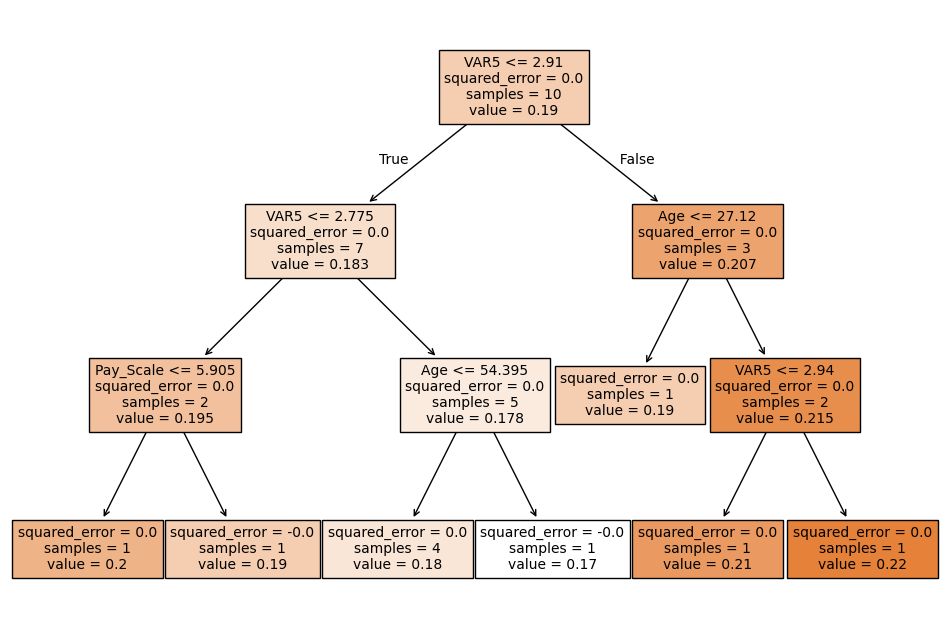

In [70]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# X son tus variables, y es Attrition_rate
X = df5[['Age', 'growth_rate', 'VAR5', 'Pay_Scale']]
y = df5['Attrition_rate']

# Entrenar un árbol pequeño para que sea fácil de leer
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(X, y)

# Visualizar las reglas
plt.figure(figsize=(12,8))
plot_tree(arbol, feature_names=X.columns, filled=True)
plt.show()


# RESULTADOS

**CARACTERISTICAS MÁS RELEVANTES:**

Basado en las correlaciones de los grupos y sus características con la tasa de deserción (Attritio_rate)


* VAR5: Con un valor de 0.080, es la que tiene la más alta correlación positiva.
Esto significa que este grupo tiene más probabilidad de desertar.
* VAR3: Tiene una corrección inversa muy fuerte. con un valor de -0.67.
Este grupo tiene menos probabilidad de deserción.
* POST_LEVEL y TRAVEL_RATE: Niveles de puestos más altos y mayor frecuencia de viajes tiene altas probabilidades de deserción, esto quizá se deba a la mayor responsabilidad, exigencia, estrés.
* AGE y TIME_OF_SERVICE: también presentación una correlación inversa. menos probabilidad de deserción.
Este grupo de personas mayores y más tiempo en la organización, son los que tienden a permanecer y siendo los jóvenes con menos tiempo en la empresa los que tienden a desertar.


**INTERPRETACION DE GRUPOS**
* GRUPO 1 y GRUPO 2: (Veteranos estables) estos grupos tiene una tasa de deserción más baja, tienen más antigüedad, su puesto no es de los más altos (POST_LEVEL) y tampoco tienen mayor frecuencia de viajes (TRAVEL_RATE)
Su lealtad esta asegurada por la estabilidad y el progreso continuo.

* GRUPO 8: (Talento joven) Tiene la tasa de deserción más alta, de acuerdo con las variables AGE y TIME_OF_SERVICE, pertenecen al grupo de personas jóvenes con menos tiempo en la empresa. quizá buscan mayores oportunidades fuera de la empresa.

* GRUPO 9: en las variables (AGE y TIME_OF_SERVICE) muestra que es un grupo joven con poco tiempo en la empresa, sin embargo, el crecimiento (GROWTH_RATE) ha sido más acelerado, lo que significa que la oportunidad la encontró dentro de la empresa, confirmado la interpretación del grupo 8.
hipótesis: a los jóvenes no les importa el sueldo inmediato, sino el crecimiento acelerado.


**CONCLUSIONES**

* VAR5 es una variable anonimizada, pero es determinante en el grado de deserción por lo que se debe investigar más a fondo.

* TRAVEL_RATE: ha mostrado que el exceso de viajes está cansando a los empleados. se debería revisar la política de viajes o tener otra estrategia.

* LOS GRUPOS 3,4 Y 8 son los de mayor deserción, las variables (AGE y GROWTH_RATE) muestran una edad entre 25 a 30 años con poco crecimiento laboral, lo que indica que la empresa está perdiendo talento joven. habría que revisar los planes de carrera profesional dentro de la empresa con el objetive de retener este talento.
